# Introduction

This is an example of how to plot a Crystal Orbital Hamilton Population (COHP) calculated with the Local-Orbital Basis Suite Towards Electronic-Structure Reconstruction (LOBSTER) code. See http://schmeling.ac.rwth-aachen.de/cohp/ for more information. (Credit: Marco Esters and Anubhav Jain).

In [ ]:
# Uncomment the subsequent lines in this cell to install dependencies for Google Colab.
# !pip install pymatgen==2022.7.19

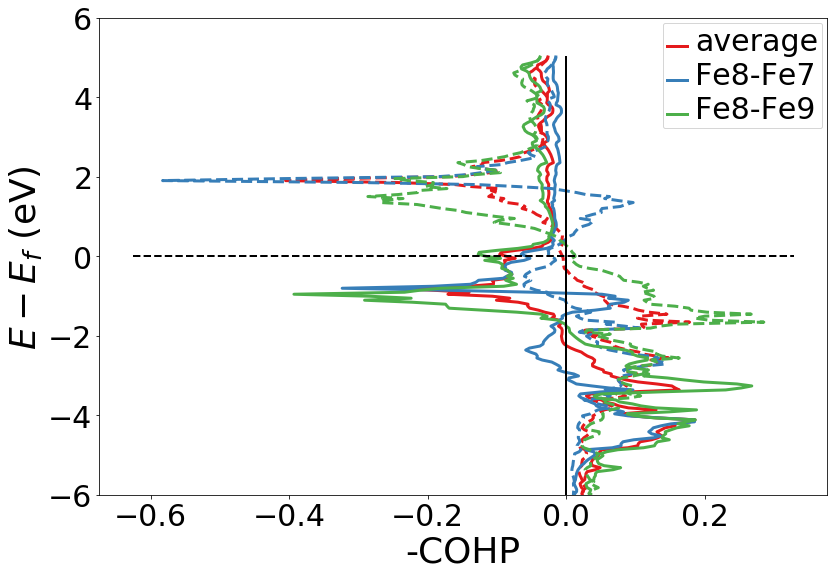

In [ ]:
from pymatgen.electronic_structure.cohp import Cohp
from pymatgen.electronic_structure.plotter import CohpPlotter
from pymatgen.io.lobster import Cohpcar

%matplotlib inline

COHPCAR_path = "/Users/shyuep/repos/pymatgen/test_files/cohp/COHPCAR.lobster"
cohpcar = Cohpcar(filename=COHPCAR_path)
cdata = cohpcar.cohp_data
cdata_processed = {}
for key in cdata:
    c = cdata[key]
    c["efermi"] = 0
    c["energies"] = cohpcar.energies
    c["are_coops"] = False
    cdata_processed[key] = Cohp.from_dict(c)
cp = CohpPlotter()
cp.add_cohp_dict(cdata_processed)
x = cp.get_plot()
x.ylim([-6, 6])
x.show()